# Contents <a id='back'></a>

* [Introduction](#intro)
* [1. Data Overview](#data_review)
    * [Conclusions](#data_review_conclusions)
* [2. Data PreProcessing](#data_preprocessing)
    * [2.1 Standardizing Column Names](#column_name)
    * [2.1 Fixing Data Type](#data_type)
* [3. Exploratory Data Analysis](#eda)
    * [3.1 Identify clients similar to a specific client's criteria. This task will facilitate the company's marketing efforts](#similar_clients)
    * [3.2 Predict whether new clients are likely to file an insurance claim. Is the predictive model better than a dummy model's predictions?](#dummy_model)
    * [3.3 Predict the potential amount of insurance claims a new client might receive using a linear regression model](#linear_regression)
    * [3.4 Protect clients' personal data (data masking) without compromising the model from previous tasks.](#data_masking)
    * [3.5 Proving the Functionality of Masking Data with LR Model](#proving_masked_data)
* [4. Testing Linear Regression with Masking Data (Testing Analysis 5)](#testing_linear_regression)
    * [4.1 Original Data Transformation and Creating Matrix P2](#transformation)
    * [4.2 Training the model with data without masking](#training_without_masking)
    * [4.3 Data Masking](#data_masking_lr)
    * [4.4 Training the model with data that has been masked](#train_masked_data)
* [General Conclusion](#end)

# Introduction <a id='intro'></a>

In this project, I will create a machine learning model using the kNN algorithm. I will not choose the best model; instead, I will demonstrate that my algorithm works accurately. Furthermore, I will compare the RMSE and R-square values of unmasked and masked data using Linear Regression.


**Objective:**

To confirm whether masking data will result in no alteration of the RMSE and R-square values.

**This project will comprise the following steps:**

1. Data Overview
2. Data preprocessing
3. Exploratory Data Analysis
4. Testing Linear Regression with Masking Data

[Back to Contents](#back)

## 1. Data Overview <a id='data_review'></a>

The steps to be performed are as follows:
1. Checking the number of rows and columns.
2. Checking for missing values.
3. Checking for duplicate data.
4. Checking statistical information in columns with numerical data types.
5. Checking values in columns with categorical data types.

[Back to Contents](#back)

In [2]:
# load library

import numpy as np
import pandas as pd

import math

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from IPython.display import display

In [3]:
# load dataset
df = pd.read_csv('data/insurance_us.csv')

In [4]:
df.sample(10)

,Gender,Age,Salary,Family members,Insurance benefits
2240,0,60.0,27900.0,0,4
799,0,23.0,31900.0,1,0
4555,0,51.0,43000.0,1,2
4871,1,18.0,29200.0,0,0
244,0,29.0,47000.0,5,0
2380,1,19.0,45000.0,3,0
1286,1,42.0,60500.0,2,0
3104,1,33.0,41000.0,0,0
2024,1,29.0,52500.0,0,0
2165,1,32.0,48700.0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              5000 non-null   int64  
 1   Age                 5000 non-null   float64
 2   Salary              5000 non-null   float64
 3   Family members      5000 non-null   int64  
 4   Insurance benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
# checking missing values
df.isnull().sum()

Gender                0
Age                   0
Salary                0
Family members        0
Insurance benefits    0
dtype: int64

In [7]:
df.describe()

,Gender,Age,Salary,Family members,Insurance benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


**Findings**

1. The column names are not standardized.
1. The Age column has a float data type. This column will be converted to an integer data type.

## 2. Data Preprocessing <a id='data_preprocessing'></a>

### 2.1 Standardizing Column Names <a id='column_names'></a>

In [8]:
df = df.rename(columns={
    'Gender': 'gender',
    'Age': 'age',
    'Salary': 'income',
    'Family members': 'family_members',
    'Insurance benefits': 'insurance_benefits'})

### 2.2 Fixing Data Type <a id='data_type'></a>

In [9]:
df['age'] = df['age'].astype('int')

In [10]:
# verify data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


[Back to Contents](#back)

## 3 Exploratory Data Analysis <a id='eda'></a>

Few things to be analyzed:
1. Identify clients similar to a specific client's criteria. This task will facilitate the company's marketing efforts.
2. Predict whether new clients are likely to file an insurance claim. Is the predictive model better than a dummy model's predictions?
3. Predict the potential amount of insurance claims a new client might receive using a linear regression model.
4. Protect clients' personal data (data masking) without compromising the model from previous tasks.
5. Proving the Functionality of Masking Data with LR Model

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


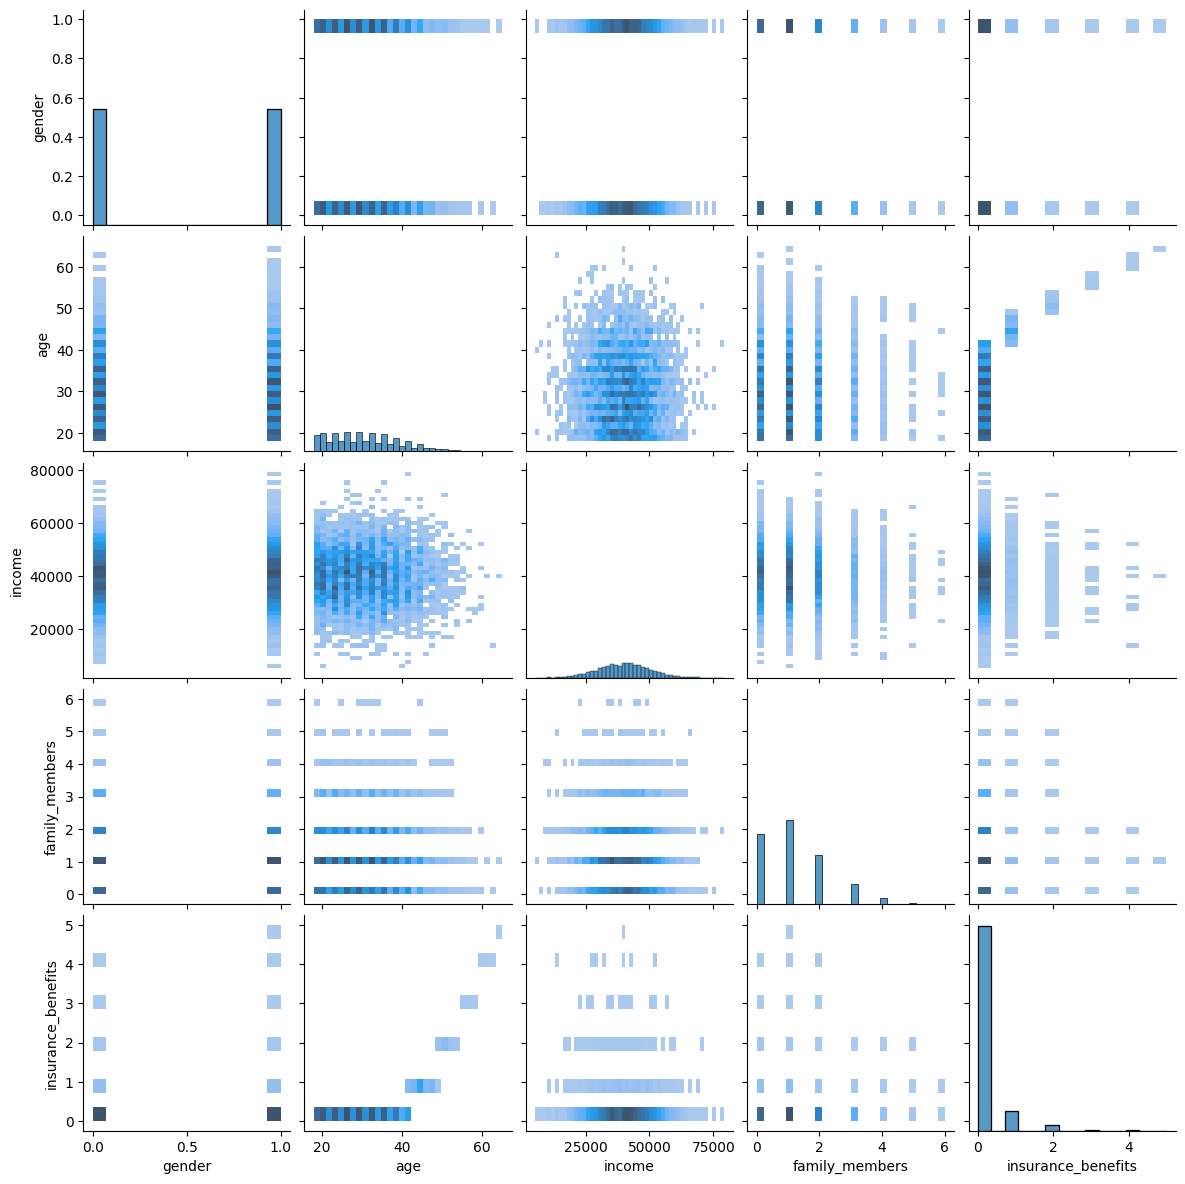

In [11]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

**Findings**

In general, `gender` does not seem to influence `insurance_benefits`, but `age` and `family_members` appear to have a correlation with `insurance_benefits`.

### 3.1 Identify clients similar to a specific client's criteria. This task will facilitate the company's marketing efforts. <a id='similar_clients'></a>

In conducting Analysis 1, the K-Nearest Neighbor algorithm will be used to classify data based on the train dataset, taken from its k nearest neighbors, where k represents the number of nearest neighbors.

Several vector distance metrics will be used:

   - Euclidean Distance: Calculates the distance between two points in Euclidean space to learn the relationship between angles and distances.
   
   - Manhattan Distance: The distance from one point to another in a Cartesian coordinate system by traveling along the vertical and horizontal parts, without ever going back.

A function will be created to display the k-nearest neighbors for the nth object based on a specific distance metric.

Several assumptions are applied in Analysis 1:
1. The amount of received insurance claims is not considered.

During testing, four combinations will be conducted:
- Scaling
  - Data is not scaled
  - Data is scaled using [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Distance Metric
  - Euclidean
  - Manhattan

In [12]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [13]:
def get_knn(df, n, k, metric):
    
    """
    Display k nearest neighbors

    :param df: Pandas DataFrame used to find similar objects within it
    :param n: number of the object for which k nearest neighbors are sought
    :param k: number of k nearest neighbors to be displayed
    :param metric: name of the distance metric
    """


    nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors = k, metric = metric, algorithm = 'brute')
    nbrs.fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

#### 3.1.1 Data Scalling is performed for consistent scale in distance calculations.

For instance, age and income have different scales (age = years, income = dollars), hence data scaling is necessary. 

MaxAbsScaler is utilized to scale data to its maximum value; that is, dividing each observation by the maximum value of the variable: The result of the previous transformation is a distribution where values roughly vary within the range of -1 to 1.

In [14]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [15]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
2244,1,0.400000,0.534177,0.166667,0
4455,0,0.476923,0.524051,0.166667,0
2313,0,0.630769,0.435443,0.166667,0
1721,1,0.446154,0.345570,0.166667,0
1548,0,0.584615,0.668354,0.333333,0


#### 3.1.2 Apply the Function

##### 3.1.2.1 df - euclidean

In [17]:
get_knn(df, 1, 50, 'euclidean')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,gender,age,income,family_members,insurance_benefits,distance
1,0,46,38000.0,1,1,0.000000
3920,0,40,38000.0,0,0,6.082763
4948,1,37,38000.0,1,0,9.055385
2528,1,36,38000.0,0,0,10.099505
3593,0,33,38000.0,0,0,13.038405
3868,0,32,38000.0,0,0,14.035669
3531,0,27,38000.0,0,0,19.026298
123,1,27,38000.0,5,0,19.442222
1905,1,26,38000.0,2,0,20.049938
2003,1,22,38000.0,1,0,24.020824


##### 3.1.2.2 df - manhattan

In [18]:
get_knn(df, 1, 50, 'manhattan')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,gender,age,income,family_members,insurance_benefits,distance
1,0,46,38000.0,1,1,0.0
3920,0,40,38000.0,0,0,7.0
4948,1,37,38000.0,1,0,10.0
2528,1,36,38000.0,0,0,12.0
3593,0,33,38000.0,0,0,14.0
3868,0,32,38000.0,0,0,15.0
3531,0,27,38000.0,0,0,20.0
1905,1,26,38000.0,2,0,22.0
123,1,27,38000.0,5,0,24.0
142,0,22,38000.0,2,0,25.0


**Findings**

When using the df dataset, the results are the same (referring to the generated indices - at index 1, it has similar classification to the following indices: 3920, 4948, 2528, 3593 -) for both distance metrics.

##### 3.1.2.3 df_scaled - euclidean

In [19]:
get_knn(df_scaled, 1, 10, 'euclidean')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,gender,age,income,family_members,insurance_benefits,distance
1,0,0.707692,0.481013,0.166667,1,0.000000
4162,0,0.707692,0.477215,0.166667,1,0.003797
1863,0,0.707692,0.492405,0.166667,1,0.011392
4986,0,0.723077,0.491139,0.166667,1,0.018418
4477,0,0.692308,0.459494,0.166667,1,0.026453
2434,0,0.676923,0.482278,0.166667,1,0.030795
1654,0,0.676923,0.486076,0.166667,1,0.031183
3671,0,0.676923,0.470886,0.166667,1,0.032393
1672,0,0.738462,0.460759,0.166667,1,0.036837
4776,0,0.692308,0.445570,0.166667,1,0.038638


#### 3.1.2.4 df_scaled - manhattan

In [20]:
get_knn(df_scaled, 1, 10, 'manhattan')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,gender,age,income,family_members,insurance_benefits,distance
1,0,0.707692,0.481013,0.166667,1,0.000000
4162,0,0.707692,0.477215,0.166667,1,0.003797
1863,0,0.707692,0.492405,0.166667,1,0.011392
4986,0,0.723077,0.491139,0.166667,1,0.025511
2434,0,0.676923,0.482278,0.166667,1,0.032035
1654,0,0.676923,0.486076,0.166667,1,0.035833
4477,0,0.692308,0.459494,0.166667,1,0.036904
55,0,0.707692,0.441772,0.166667,1,0.039241
3671,0,0.676923,0.470886,0.166667,1,0.040896
3556,0,0.707692,0.439241,0.166667,1,0.041772


**Findings**

When using the df_scaled dataset, the results are NOT the same for both distance metrics.
For Euclidean distance, index 1 has similar classification to the following indices: 4162, 1863, 4986, 4477, 2434, etc.
On the other hand, for Manhattan distance, index 1 has similar classification to the following indices: 4162, 1863, 4968, 2434, 1654, 4477, etc.

### Analysis Result

1. Does non-scaled data affect the kNN algorithm? If it does, how does it affect it?

    - Yes, when data is not scaled, the results will be the same (regardless of the metric used). Therefore, the results might be inaccurate due to differences in the scales used in each column.
    
    For example: age and income have different scales (age = years, income = dollars).
    
    In calculations, it is important to maintain a consistent scale as much as possible.
    

2. How similar are the results you obtained from the Euclidean metric compared to when you used the Manhattan distance metric (regardless of whether there is scaling)?

    - The results are quite similar when using both distance metrics (whether scaling the data or not). More specifically, with scaled data, the results are more different.

### 3.2 Predict whether new clients are likely to file an insurance claim. Is the predictive model better than a dummy model's predictions? <a id='dummy_model'></a>

With the target variable `insurance_benefits` greater than zero, an evaluation will be conducted to determine whether the kNN classification model is a better approach compared to the dummy model.

### 3.2.1 Data Preparation

In [21]:
# checking data composition in target variable
df['insurance_benefits'].value_counts()

insurance_benefits
0    4436
1     423
2     115
3      18
4       7
5       1
Name: count, dtype: int64

**Findings**

There are 5 values in the `insurance_benefits` column, namely 0, 1, 2, 3, and 4.

In [22]:
# Binary classification, for values greater than 1, will be classified as 1.
df['insurance_benefits_received'] = np.where(df['insurance_benefits'] == 0, 0, 1)
df_scaled['insurance_benefits_received'] = np.where(df_scaled['insurance_benefits'] == 0, 0, 1)

In [23]:
#  data composition of the target variable after binary classification.
df['insurance_benefits_received'].value_counts()

insurance_benefits_received
0    4436
1     564
Name: count, dtype: int64

<Axes: xlabel='insurance_benefits_received'>

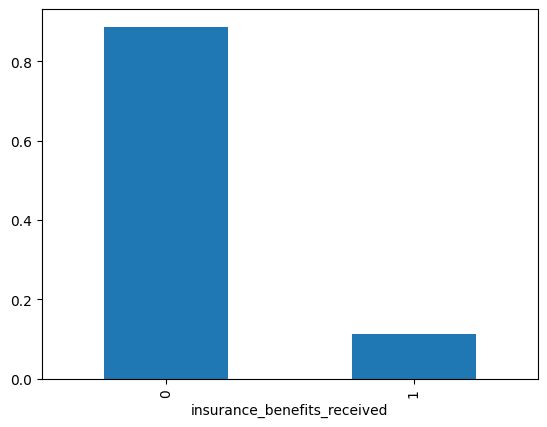

In [24]:
# visualizing using barplot
data_composition = df['insurance_benefits_received'].value_counts(normalize = True)
data_composition.plot(kind='bar')

**Findings**

After binary classification, the data results in an imbalanced distribution.

### 3.2.2 Creating Model

In [25]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

#### 3.2.2.1 Without Data Scalling

In [26]:
y = df['insurance_benefits_received']
X = df.drop(['insurance_benefits_received', 'insurance_benefits'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [27]:
model_1= sklearn.neighbors.KNeighborsClassifier()
model_1.fit(X_train, y_train)
predicted_test = model_1.predict(X_test)

In [28]:
# evaluating model without scalling
eval_classifier(y_test, predicted_test)

F1: 0.17
Confusion Matrix
[[0.884      0.00866667]
 [0.09666667 0.01066667]]


#### 3.2.2.2 With Data Scalling

In [29]:
scaler = sklearn.preprocessing.MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
model_2= sklearn.neighbors.KNeighborsClassifier()
model_2.fit(X_train_scaled, y_train)
predicted_test_scaled = model_2.predict(X_test_scaled)

In [31]:
# evaluate the model with data scalling
eval_classifier(y_test, predicted_test_scaled)

F1: 0.95
Confusion Matrix
[[0.89       0.00266667]
 [0.00866667 0.09866667]]


**Findings of F1 Score with and without Data Scaling**

1. F1 Score without scaling is 0.17
2. F1 Score with scaling is 0.95
3. The closer the F1 Score is to 1.0, the better the classification model's precision and recall are (when scaling is applied).
4. This is because kNN is a distance-based algorithm, making data scaling crucial.

### 3.2.3 Dummy Classifier

#### 3.2.3.1 without Data Scalling

In [32]:
dummy_model = DummyClassifier()
dummy_model.fit(X_train, y_train)
predicted_test_dummy = dummy_model.predict(X_test)

In [33]:
# evaluate dummy model without data scalling
eval_classifier(y_test, predicted_test_dummy)

F1: 0.00
Confusion Matrix
[[0.89266667 0.        ]
 [0.10733333 0.        ]]


#### 3.2.3.2 With Data Scalling

In [34]:
dummy_model.fit(X_train_scaled, y_train)
dummy_model_scaled = dummy_model.predict(X_test_scaled)

In [35]:
# evaluate dummy model with data scalling
eval_classifier(y_test, dummy_model_scaled)

F1: 0.00
Confusion Matrix
[[0.89266667 0.        ]
 [0.10733333 0.        ]]


**Findings of F1 Score for Dummy Model with and without Data Scaling**

1. F1 score for Dummy Model without data scaling is 0.
2. F1 score for Dummy Model with data scaling is 0.
3. Data scaling has no effect on the dummy classifier model.

### Analysis Result

The kNN model has a better F1 score compared to the dummy model.

### 3.3 Predict the potential amount of insurance claims a new client might receive using a linear regression model. <a id='linear_regression'></a>

With `insurance_benefit` as the target, an evaluation related to RMSE will be conducted for the Linear Regression model.

We will create an implementation of Linear Regression (LR) for Sure Tomorrow. 

Let's define:

- $X$ — the feature matrix, where each row represents a single case, each column represents a feature, and the first column consists of ones.
- $y$ — the target vector.
- $\hat{y}$ — the estimated target vector.
- $w$ — the weight vector.

The linear regression matrix equation can be formulated as:

$$
y = Xw
$$

The training goal is to find $w$ that minimizes the L2 distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It seems there's an analytical solution for the above problem:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weight vector $w$, and finally, it can be used to compute the prediction values:

$$
\hat{y} = X_{val}w
$$

#### 3.3.1 Creating a Custom Linear Regression Class

In [37]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # Adding bias/intercept term
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)

    def predict(self, X):
        
        # Adding bias/intercept term
        X2 = np.append(np.ones([len(X), 1]), X, axis = 1)
        y_pred = X2.dot(self.weights)
        
        return y_pred

In [38]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

##### 3.3.1.1 Data Preparation

Split the entire dataset into a *training set* and a *validation set* with a 70:30 ratio. Use the RMSE metric for model evaluation.

In [39]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### 3.3.1.2 Applying the `MyLinearRegression` Class

In [40]:
my_lr = MyLinearRegression()

my_lr.fit(X_train, y_train)
print(my_lr.weights)

y_test_pred = my_lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.19740784e-01  3.54081517e-02  1.84735250e-04 -3.89692232e-07
 -1.37746920e-02]
RMSE: 0.36
R2: 0.65


#### 3.3.1 Applying LinearRegression Class (from sklearn)

In [41]:
lr_sklearn = LinearRegression()

lr_sklearn.fit(X_train, y_train)

y_test_pred_sklearn = lr_sklearn.predict(X_test)
eval_regressor(y_test, y_test_pred_sklearn)

RMSE: 0.36
R2: 0.65


### Analysis Result

1. The RMSE and R2 values in both the `MyLinearRegression` and `LinearRegression` (sklearn library) models are the same.
2. By applying the linear regression formula, Sure Tomorrow can create its own custom class with accurate results.
3. A good RMSE value is close to 0. With a value of 0.36, it can be considered that both models have good performance (below 0.5).
4. The R2 value is categorized as strong if it's greater than 0.67. With a result of 0.65, the R2 value falls into the moderate (fair) category.

### 3.4 Protect clients' personal data (data masking) without compromising the model from previous tasks <a id='data_masking'></a>

The best way to blur data is by multiplying the numerical features (remember that these features can be seen in the matrix $X$) with a invertible matrix $P$.

$$
X' = X \times P
$$

This will be done as described above, and we will examine how the feature values will appear after the transformation. The invertible property is crucial in this case, so it will be ensured that $P$ is invertible.

#### 3.4.1 Original Data Transformation and Creating the Matrix P

In [42]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [43]:
# transform it into matrix form
X = df_pn.to_numpy()

In [44]:
# show the initial data after being transformed into a matrix
X

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

Creating a random matrix $P$

In [45]:
# Creating matrix P as a constant
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

In [46]:
# Checking the values of P in array form.
P

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

Checking if the matrix $P$ is invertible.

In [47]:
P_inverse = np.linalg.det(P)
P_inverse

0.24339135998015463

**Findings**

Since the value of p_inverse is greater than 0, then P is invertible.

#### 3.4.2 Data Masking Process

In [48]:
# applying function
X.dot(P)

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

**Findings**

By comparing the two datasets above (X before masking and X after masking), it is evident that the data has been successfully obfuscated and cannot be interpreted anymore.

#### 3.4.3 Data Recovery

Performing the recovery of the original data from $X'$ using the known value of $P$. This is done by rearranging the equation above, moving $P$ from the right side of the equation to the left side.

In [50]:
(X.dot(P)).dot(P_inverse)

array([[ 1547.89974942,  5447.19713102,  4484.26450205, 11196.17212745],
       [ 1186.11767001,  4176.68506915,  3438.09299028,  8580.38654459],
       [  655.4815137 ,  2308.90724823,  1900.6021333 ,  4742.44672792],
       ...,
       [ 1057.83323016,  3721.26922453,  3063.36324284,  7650.64447659],
       [ 1020.80605795,  3590.5071578 ,  2955.75180852,  7380.57225119],
       [ 1266.96600243,  4457.52976289,  3669.61487074,  9163.58563191]])

**Findings**

The recovered data after the data recovery process is not the same as the original data (X).

#### Conclusion of Analysis 4

Considering the results obtained in the three steps above:

In [51]:
# original data
X

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

In [52]:
# data after masking
X.dot(P)

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

In [54]:
# Data after being restored to its original state
(X.dot(P)).dot(P_inverse)

array([[ 1547.89974942,  5447.19713102,  4484.26450205, 11196.17212745],
       [ 1186.11767001,  4176.68506915,  3438.09299028,  8580.38654459],
       [  655.4815137 ,  2308.90724823,  1900.6021333 ,  4742.44672792],
       ...,
       [ 1057.83323016,  3721.26922453,  3063.36324284,  7650.64447659],
       [ 1020.80605795,  3590.5071578 ,  2955.75180852,  7380.57225119],
       [ 1266.96600243,  4457.52976289,  3669.61487074,  9163.58563191]])

**There are differences between the data before transformation (masking data) and the data after transformation. This is because the process of creating the variable P (as a constant) uses random values. If the process is good, then the original data and the data restored to its original state should be the same.**

### 3.5 Proving the Functionality of Masking Data with LR Model <a id='proving_masked_data'></a>

In this process, we will analytically demonstrate that a specific masking data method will not affect the predictions of linear regression values, and the predicted values will remain unchanged from their original results.

So, the existing data has been masked, and now we have

$X \times P$ 

instead of just $X$. 

As a result, there is another weight $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

**Findings**

1. The way to relate $w$ and $w_P$ is by multiplying them by the same matrix.
2. The significance of regression quality when measured with RMSE is that RMSE is usually used for data with fluctuating values, making it suitable for comparing various regression models. Additionally, RMSE is used when the magnitude of the error has significant implications.

[Back to Contents](#back)

## 4. Testing Linear Regression with Masking Data (Testing Analysis 5) <a id='testing_linear_regression'></a>

In this process, it will be demonstrated whether Linear Regression can computationally work with the chosen masking transformation.

**Procedure**

- Creating a square matrix $P2$ from random numbers.
- Checking if the matrix is invertible. If not, repeat from the first step until an invertible matrix is obtained.
- Use $XP$ as the new feature matrix.

### 4.1 Original Data Transformation and Creating Matrix P2 <a id='transformation'></a>

In [55]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [56]:
# transform into matrix form
X = df_pn.to_numpy()

In [57]:
y = df['insurance_benefits'].to_numpy()

In [58]:
# creation of matrix P2 as a constant
rng = np.random.default_rng(seed=42)
P2 = rng.random(size=(X.shape[1], X.shape[1]))

In [59]:
P2_inverse = np.linalg.inv(P2)
P2_inverse

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

### 4.2 Training the model with data without masking <a id='training_without_masking'></a>

In [60]:
reg_notmask = LinearRegression()
reg_notmask.fit(X, y)

y_test_pred_notmask = reg_notmask.predict(X)
eval_regressor(y, y_test_pred_notmask)

RMSE: 0.35
R2: 0.65


### 4.3 Data Masking Process <a id='data_masking_lr'></a>

In [61]:
# applying function
X_mask = X.dot(P2)

### 4.4 Training the model with data that has been masked <a id='train_masked_data'></a>

In [62]:
reg_masking = LinearRegression()
reg_masking.fit(X_mask, y)

y_test_pred_masking = reg_masking.predict(X_mask)
eval_regressor(y, y_test_pred_masking)

RMSE: 0.35
R2: 0.65


[Back to Contents](#back)

**Analysis Result**

The RMSE value in the LinearRegression model with or without masking is the SAME.
This proves that certain data masking will not affect the prediction of linear regression values, and the predicted values will remain unchanged from the original results.

# General Conclusion <a id='end'></a>

To recap all the processes conducted, here are the findings from each analysis:

1. Analysis 1: Finding clients based on desired criteria.
    - Scaling data affects kNN algorithm results. If data scaling is not performed, the results are inaccurate due to varying scales used in different variables.
    - Regarding the use of distance metrics to measure vector distances, the results are quite similar when using Euclidean and Manhattan metrics (both with and without data scaling).

2. Analysis 2: Predicting the likelihood of new clients making insurance claims.
    - The kNN model performs better in terms of F1 score compared to the dummy model.

3. Analysis 3: Predicting the amount of insurance claims for new clients using Linear Regression.
    - The RMSE and R2 values in MyLinearRegression and LinearRegression (from the sklearn library) models are the same.
    - By implementing the linear regression formula, Sure Tomorrow can create its own class with accurate results.
    - A good RMSE value is close to 0. With a value of 0.36, it can be considered that both models have acceptable performance (below 0.5).
    - An R2 value is considered strong if it exceeds 0.67. With a value of 0.65, the R2 value falls into the moderate category.

4. Analysis 4: Protecting client's private data (masking data) without compromising the quality of the model developed in step 3.
    - There are differences between the data before transformation (masked data) and the data after transformation. This is due to the random values used in creating the P variable. With proper processes, the original data and the restored data should match.

5. Analysis 5: Proving that Masking Data can work with the LR model (Related to Analysis 4).
    - The connection between 𝑤 and 𝑤𝑃 is achieved by multiplying them with the same matrix.
    - Assessing regression quality using RMSE is appropriate as it is usually used for data with fluctuating values, making it suitable for comparing various regression models. RMSE is also used when a larger error has significant implications.

6. Testing Linear Regression with Masking Data (Testing Analysis 5).
    - The RMSE value in the LinearRegression model with or without masking is the SAME. This demonstrates that certain data masking will not affect the prediction of linear regression values, and the predicted values will remain unchanged from the original results.

[Back to Contents](#back)